<a href="https://colab.research.google.com/github/redballoon73/Portfolio/blob/main/%EC%9E%AC%EB%AC%B4%EC%A0%9C%ED%91%9C_%EA%B7%B8%EB%9E%98%ED%94%84_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#그래프 한글패치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#이후 런타임 재시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,662 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
!pip install dart-fss
import dart_fss as dart
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

matplotlib.rcParams['font.family'] = 'NanumGothic' #Windows
matplotlib.rcParams['font.size'] = 15 #글자 폰트 크기
matplotlib.rcParams['axes.unicode_minus'] = False #한글 폰트 사용 시, 마이너스 글자 깨지는 현상 해결

# Open DART API KEY 설정
api_key='5b15e7128e4a340a732f7fa01844870229f465b6'
dart.set_api_key(api_key=api_key)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.2 MB/s 
     |████████████████████████████████| 61 kB 7.9 MB/s 
     |████████████████████████████████| 41 kB 677 kB/s 
     |████████████████████████████████| 1.9 MB 41.9 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Created wheel for arelle: filename=arelle-2.2-py3-none-any.whl size=2060307 sha256=4522802d0e57f6bf7fbd2cc62a091a3c12c017c97c5408125a3046970cc70c79
  Stored in directory: /root/.cache/pip/wheels/8c/b2/69/919f97f4f77fd85a26e52df16f1763d68cd18210acc9320ad5
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=997bba5e0b4b663bca2b065494c3e0a6655c346065c0d067a521bb3ea719f544
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for halo: filename=halo-0.0.31-py3-none-any.whl size=11261 sha256=6a96e

Error occurred during loading data. Trying to use cache server https://fake-useragent.herokuapp.com/browsers/0.1.11
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/fake_useragent/utils.py", line 154, in load
    for item in get_browsers(verify_ssl=verify_ssl):
  File "/usr/local/lib/python3.7/dist-packages/fake_useragent/utils.py", line 99, in get_browsers
    html = html.split('<table class="w3-table-all notranslate">')[1]
IndexError: list index out of range


'5b15e7128e4a340a732f7fa01844870229f465b6'

In [ ]:
#회사 이름 입력, 필요 재무제표 데이터
corp_NAME = "NAVER"
#financial_type =  "bs" #bs : 재무상태표 is : 손익계산서 cis : 포괄손익계산서

# DART 에 공시된 회사 리스트 불러오기
corp_list = dart.get_corp_list()

# 삼성전자 검색
corp_num = corp_list.find_by_corp_name(corp_NAME, exactly=True)[0]

#정규식으로 검색한 회사의 기업코드만 가져오기
data = str(corp_num)
p = re.compile('[0-9]{8}')
m = p.search(data)

#dart에서 공시된 회사 재무제표 가져오기
fs = dart.fs.extract(corp_code=m.group(), bgn_de='20200101', separate=True)

Output()

Output()

Output()

Annual reports:   0%|          | 0/3 [00:00<?, ?report/s]

In [ ]:
df_fs = fs.show("bs",show_concept=False, show_class=False)
df_fs

[D210005] Statement of financial position, current/non-current - Separate financial statements (Unit: KRW)  \
                                                                                                     label_ko   
0                                                유동자산                                                           
1                                            현금및현금성자산                                                           
2                                              단기금융상품                                                           
3                                   당기손익-공정가치 측정 금융자산                                                           
4                                           매출채권및기타채권                                                           
5                                                재고자산                                                           
6                                     기타포괄손익-공정가치금융자산                                                           
7                                              기타유동자산                                                           
8                                               비유동자산                                                           
9                                                유형자산                                                           
10                                              사용권자산                                                           
11                                               무형자산                                                           
12                                             장기금융상품                                                           
13                                  당기손익-공정가치 측정 금융자산                                                           
14                                기타포괄손익-공정가치 측정 금융자산                                                           
15                                종속기업, 관계기업 및 공동기업투자                                                           
16                                            이연법인세자산                                                           
17                                          매출채권및기타채권                                                           
18                                            기타비유동자산                                                           
19                                               자산총계                                                           
20                                               유동부채                                                           
21                                          매입채무및기타채무                                                           
22                                              단기차입금                                                           
23                                            당기법인세부채                                                           
24                                               충당부채                                                           
25                                               리스부채                                                           
26                                             기타유동부채                                                           
27                                              비유동부채                                                           
28                                          매입채무및기타채무                                                           
29                                                 사채                                                           
30                                              장기차입금                                                           
31                                            순확정급여부채                                                           
32                                               충당부채                                                           
33                                            이연

In [ ]:
def extract_bs():
  df_fs = fs.show("bs",show_concept=False, show_class=False)

  #인덱싱 탈락시키기 전에 년도 저장
  years = []
  I = len(df_fs.columns)
  for i in range(2,I):
    year = df_fs.columns[i][0]
    years.append(year)

  class_col = ['lavel_ko']
  new_col = np.append(class_col, years)

  #가장 윗줄의 인덱스 탈락시키기
  df_fs.columns = df_fs.columns.droplevel()

  #필요 없는 열 탈락시키기
  df_fs.drop('label_en', inplace=True, axis=1)
  df_fs.columns = new_col

  #인덱스 바꾸기
  df_fs.set_index(keys=['lavel_ko'], inplace=True, drop=True)

  # 표 역전시키기
  df_fs = df_fs.T

  # matplotlib을 위해 x, y 값 바꿔주기
  df_FS = df_fs.loc[::-1]
  return df_FS

extract_bs()

lavel_ko,유동자산,현금및현금성자산,단기금융상품,당기손익-공정가치 측정 금융자산,매출채권및기타채권,재고자산,기타포괄손익-공정가치금융자산,기타유동자산,비유동자산,유형자산,...,이연법인세부채,리스부채,기타비유동부채,부채총계,자본금,자본잉여금,기타자본구성요소,이익잉여금,자본총계,자본과부채총계
20171231,"2,629,855,599,793.0","457,779,230,883.0","1,196,197,600,000.0",NaN,"612,717,764,308.0","3,424,635,032.0",NaN,"46,097,492,438.0","2,712,498,982,568.0","765,297,081,436.0",...,NaN,NaN,"425,347,212.0","1,408,493,957,690.0","16,481,339,500.0","362,406,388,434.0","-1,178,358,989,169.0","4,733,331,885,906.0","3,933,860,624,671.0","5,342,354,582,361.0"
20181231,"1,226,980,759,079.0","111,029,337,132.0","232,338,861,060.0","103,754,499,866.0","706,994,025,829.0","2,587,442,031.0","32,784,625,971.0","37,491,967,190.0","4,701,611,694,177.0","806,940,724,581.0",...,NaN,NaN,"373,263,876.0","1,371,710,609,444.0","16,481,339,500.0","362,406,388,434.0","-1,477,546,568,301.0","5,655,540,684,179.0","4,556,881,843,812.0","5,928,592,453,256.0"
20191231,"880,761,992,755.0","414,429,035,373.0","3,998,800,000.0","11,802,308,451.0","410,689,554,192.0","907,256,265.0",NaN,"38,935,038,474.0","5,790,825,341,027.0","855,943,164,259.0",...,NaN,"38,637,306,142.0","321,180,540.0","1,142,040,460,873.0","16,481,339,500.0","362,406,388,434.0","-1,548,531,531,541.0","6,699,190,676,516.0","5,529,546,872,909.0","6,671,587,333,782.0"
20201231,"958,002,631,668.0","369,314,307,214.0","3,998,800,000.0","1,134,151,477.0","553,283,357,905.0","2,546,626,045.0",NaN,"27,725,389,027.0","7,865,547,902,079.0","1,078,819,008,478.0",...,"29,669,335,032.0","24,672,861,187.0","269,097,204.0","1,561,424,037,310.0","16,481,339,500.0","675,891,629,000.0","-1,233,773,041,044.0","7,803,526,568,981.0","7,262,126,496,437.0","8,823,550,533,747.0"
20211231,"1,779,773,191,131.0","964,418,443,986.0","205,748,800,000.0","3,692,735,930.0","538,909,879,285.0","1,657,864,895.0","24,254,505,540.0","41,090,961,495.0","11,182,647,374,778.0","1,429,366,401,646.0",...,NaN,"19,505,218,405.0","387,013,868.0","3,629,961,914,157.0","16,481,339,500.0","1,055,716,814,497.0","-997,204,415,003.0","9,257,464,912,758.0","9,332,458,651,752.0","12,962,420,565,909.0"


In [ ]:
def extract_cis():
  #가져온 재무제표에서 financial_type에 맞는 문서 가져오기
  df_fs = fs.show("cis",show_concept=False, show_class=False)

  #인덱싱 탈락시키기 전에 년도 저장
  years = []
  I = len(df_fs.columns)
  for i in range(2,I):
    year = df_fs.columns[i][0]
    years.append(year)

  class_col = ['lavel_ko']
  new_col = np.append(class_col, years)

  #가장 윗줄의 인덱스 탈락시키기
  df_fs.columns = df_fs.columns.droplevel()

  #필요 없는 열 탈락시키기
  df_fs.drop('label_en', inplace=True, axis=1)
  df_fs.columns = new_col

  #인덱스 바꾸기
  df_fs.set_index(keys=['lavel_ko'], inplace=True, drop=True)

  # 표 역전시키기
  df_fs = df_fs.T

  # matplotlib을 위해 x, y 값 바꿔주기
  df_FS = df_fs.loc[::-1]
  return df_FS
extract_cis()

lavel_ko,영업수익,영업비용,영업이익,기타수익,기타비용,이자수익,금융수익,금융비용,법인세비용차감전순이익,법인세비용,...,기타포괄손익,후속기간에 당기손익으로 재분류되는 항목,기타포괄손익-공정가치 측정 금융자산 평가손익(세후기타포괄손익),후속기간에 당기손익으로 재분류되지 않는 항목,기타포괄손익-공정가치 측정 지분상품 평가손익,기타포괄손익-공정가치 측정 지분상품 처분손익,순확정급여부채의 재측정요소,총포괄이익,기본주당순이익,희석주당순이익
20170101-20171231,"2,930,661,324,862.0","-1,752,423,852,137.0","1,178,237,472,725.0","7,546,980,201.0","108,940,998,443.0","31,595,117,412.0","62,116,110,516.0","7,556,656,611.0","1,162,998,025,800.0","313,585,673,092.0",...,"-15,664,655,885.0","-6,771,448,583.0",NaN,"-8,893,207,302.0",NaN,NaN,"-8,893,207,302.0","833,747,696,823.0","5,838.0","5,838.0"
20180101-20181231,"3,459,014,042,545.0","-2,195,465,089,416.0","1,263,548,953,129.0","34,248,500,036.0","158,244,574,044.0","20,003,925,626.0","153,034,308,231.0","89,121,314,522.0","1,223,469,798,456.0","323,047,038,865.0",...,"-53,887,230,319.0","3,468,321,711.0","3,468,321,711.0","-57,355,552,030.0","-69,115,675,153.0","114,374,500.0","11,645,748,623.0","846,535,529,272.0","6,157.0","6,157.0"
20190101-20191231,"3,900,013,295,633.0","-2,506,201,301,207.0","1,393,811,994,426.0","19,881,970,261.0","99,543,705,520.0","7,819,792,284.0","267,155,641,370.0","47,629,623,696.0","1,541,496,069,125.0","448,971,525,987.0",...,"8,821,138,556.0","297,056,077.0","297,056,077.0","8,524,082,479.0","11,611,891,278.0","10,255,359,647.0","-13,343,168,446.0","1,101,345,681,694.0","7,507.0","7,507.0"
20200101-20201231,"4,126,629,312,584.0","-2,685,815,580,704.0","1,440,813,731,880.0","50,734,211,779.0","206,972,193,347.0","4,956,097,488.0","412,115,444,862.0","41,343,378,557.0","1,660,303,914,105.0","463,379,370,520.0",...,"112,773,681,347.0",NaN,NaN,"112,773,681,347.0","110,915,469,318.0","2,034,430,424.0","-176,218,395.0","1,309,698,224,932.0","8,214.0","8,168.0"
20210101-20211231,"5,018,667,294,374.0","-3,459,938,514,095.0","1,558,728,780,279.0","51,361,277,372.0","279,284,899,638.0","5,275,649,103.0","824,513,997,579.0","71,247,340,942.0","2,089,347,463,753.0","564,592,453,792.0",...,"-70,103,083,855.0",NaN,NaN,"-70,103,083,855.0","-74,057,026,958.0","17,199,903,875.0","-13,245,960,772.0","1,454,651,926,106.0","10,257.0","10,165.0"


In [ ]:
extract_bs().columns

Index(['유동자산', '현금및현금성자산', '단기금융상품', '당기손익-공정가치 측정 금융자산', '매출채권및기타채권', '재고자산',
       '기타포괄손익-공정가치금융자산', '기타유동자산', '비유동자산', '유형자산', '사용권자산', '무형자산', '장기금융상품',
       '당기손익-공정가치 측정 금융자산', '기타포괄손익-공정가치 측정 금융자산', '종속기업, 관계기업 및 공동기업투자',
       '이연법인세자산', '매출채권및기타채권', '기타비유동자산', '자산총계', '유동부채', '매입채무및기타채무', '단기차입금',
       '당기법인세부채', '충당부채', '리스부채', '기타유동부채', '비유동부채', '매입채무및기타채무', '사채',
       '장기차입금', '순확정급여부채', '충당부채', '이연법인세부채', '리스부채', '기타비유동부채', '부채총계', '자본금',
       '자본잉여금', '기타자본구성요소', '이익잉여금', '자본총계', '자본과부채총계'],
      dtype='object', name='lavel_ko')

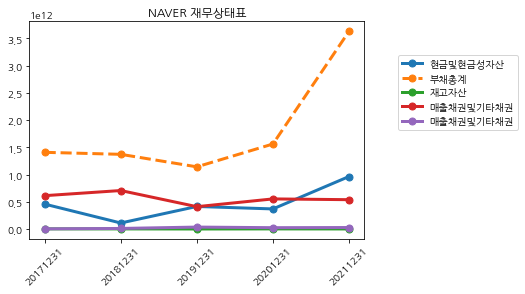

In [ ]:
type_of_data = "현금및현금성자산"
type_of_data_1 = "부채총계"
type_of_data_2 = "재고자산"
type_of_data_3 = "매출채권및기타채권"

plt.plot(extract_bs().index, extract_bs()[type_of_data], label=type_of_data, marker='o', ms=7, linewidth = 3)
plt.plot(extract_bs().index, extract_bs()[type_of_data_1], label=type_of_data_1, marker='o', ms=7, ls= '--', linewidth = 3)
plt.plot(extract_bs().index, extract_bs()[type_of_data_2], label=type_of_data_2, marker='o', ms=7,ls= '-', linewidth = 3)
plt.plot(extract_bs().index, extract_bs()[type_of_data_3], label=type_of_data_3, marker='o', ms=7,ls= '-', linewidth = 3)

plt.xticks(rotation=45)
plt.title(corp_NAME+" 재무상태표")
plt.legend(loc=(1.1,0.5))

In [ ]:
extract_cis().columns

Index(['영업수익', '영업비용', '영업이익', '기타수익', '기타비용', '이자수익', '금융수익', '금융비용',
       '법인세비용차감전순이익', '법인세비용', '당기순이익', '기타포괄손익', '후속기간에 당기손익으로 재분류되는 항목',
       '기타포괄손익-공정가치 측정 금융자산 평가손익(세후기타포괄손익)', '후속기간에 당기손익으로 재분류되지 않는 항목',
       '기타포괄손익-공정가치 측정 지분상품 평가손익', '기타포괄손익-공정가치 측정 지분상품 처분손익',
       '순확정급여부채의 재측정요소', '총포괄이익', '기본주당순이익', '희석주당순이익'],
      dtype='object', name='lavel_ko')

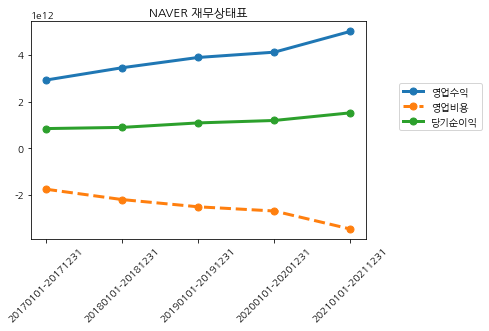

In [ ]:
type_of_data_4 = "영업수익"
type_of_data_5 = "영업비용"
type_of_data_6 = "당기순이익"

plt.plot(extract_cis().index, extract_cis()[type_of_data_4], label=type_of_data_4, marker='o', ms=7, linewidth = 3)
plt.plot(extract_cis().index, extract_cis()[type_of_data_5], label=type_of_data_5, marker='o', ms=7, ls= '--', linewidth = 3)
plt.plot(extract_cis().index, extract_cis()[type_of_data_6], label=type_of_data_6, marker='o', ms=7,ls= '-', linewidth = 3)

plt.xticks(rotation=45)
plt.title(corp_NAME+" 재무상태표")
plt.legend(loc=(1.1,0.5))

In [ ]:
import pandas as pd
#재무상태표 중요사항
important_bs = pd.DataFrame(extract_bs()[type_of_data])
important_bs[type_of_data_1] = extract_bs()[type_of_data_1]
important_bs[type_of_data_2] = extract_bs()[type_of_data_2]
important_bs[type_of_data_3] = extract_bs()[type_of_data_3]
important_bs['부채비율%'] = extract_bs()[type_of_data_1] / extract_bs()[type_of_data] *100
important_bs

,현금및현금성자산,부채총계,재고자산,매출채권,부채비율%
20171231,"2,152,027,267.0","1,549,567,657.0","2,793,649,886.0","889,436,153.0",72.00501967431624
20181231,"4,473,590,237.0","46,895,928,346.0","17,282,637,382.0","15,915,897,661.0","1,048.2839478264"
20191231,"11,277,181,603.0","35,030,466,052.0","15,729,314,756.0","9,319,505,913.0",310.6313907606228
20201231,"20,110,613,903.0","46,987,721,100.0","18,288,089,374.0","10,828,570,092.0",233.64637860702308
20211231,"7,022,555,938.0","23,355,362,343.0","23,213,283,217.0","17,003,894,853.0",332.57638029796215


In [ ]:
#손익계산서 중요사항
important_cis = pd.DataFrame(extract_cis()[type_of_data_4])
important_cis[type_of_data_5] = extract_cis()[type_of_data_5]
important_cis[type_of_data_6] = extract_cis()[type_of_data_6]
important_cis['영업이익(손실)'] = extract_cis()['영업이익(손실)']
#여기에 연간이익 증가율도 추가해주기
important_cis

,매출액,매출원가,당기순이익(손실),영업이익(손실)
20170101-20171231,"12,520,488,308.0","12,531,084,106.0","308,326,900.0","-237,673,335.0"
20180101-20181231,"140,959,206,564.0","115,882,466,341.0","4,018,580,505.0","4,303,916,036.0"
20190101-20191231,"192,881,844,986.0","154,020,600,443.0","7,814,880,165.0","8,645,139,088.0"
20200101-20201231,"227,490,312,481.0","170,569,742,379.0","17,344,870,141.0","19,746,412,584.0"
20210101-20211231,"251,936,903,361.0","191,683,172,304.0","12,935,477,217.0","12,698,998,352.0"
